In [1]:
# Tiago Moreira Trocoli da Cunha
# Numero: 226078
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# import data
y = np.load("Ex3y.npy")
data = np.zeros((100,3))
data[:,1:] = np.load("Ex3X.npy") 
data[:,0] = 1.0

# Mean Square Error
def mean_square_error(data,y,theta):
    M = len(y)
    error = y - np.dot(data,theta)
    return (1.0/(2.0*M))*(np.dot(error.T, error))
    
# Batch gradient descent
def batch_gradient_descent(data,y,theta,learning_rate,n_iterations):
    
    # M = number of variables, in this case 100.
    M = len(y)
    # create cost and theta history
    cost_history  = np.zeros(n_iterations)
    theta_history = np.zeros((n_iterations,3)) 
    
    for i in range(0,n_iterations):
        hypothesis          = np.dot(data,theta)
        theta               = theta - learning_rate*(1.0/M)*(np.dot(data.T,hypothesis - y)) 
        theta_history[i,:]  = theta.T
        cost_history[i]     = mean_square_error(data,y,theta)
        
    return (theta_history, cost_history)

#initial value of theta.
theta = np.full((3,1),0.0)
(theta_history1, cost_history1) =  batch_gradient_descent(data,y,theta,0.01,100)
(theta_history2, cost_history2) =  batch_gradient_descent(data,y,theta,0.001,100)
(theta_history3, cost_history3) =  batch_gradient_descent(data,y,theta,0.00005,100)

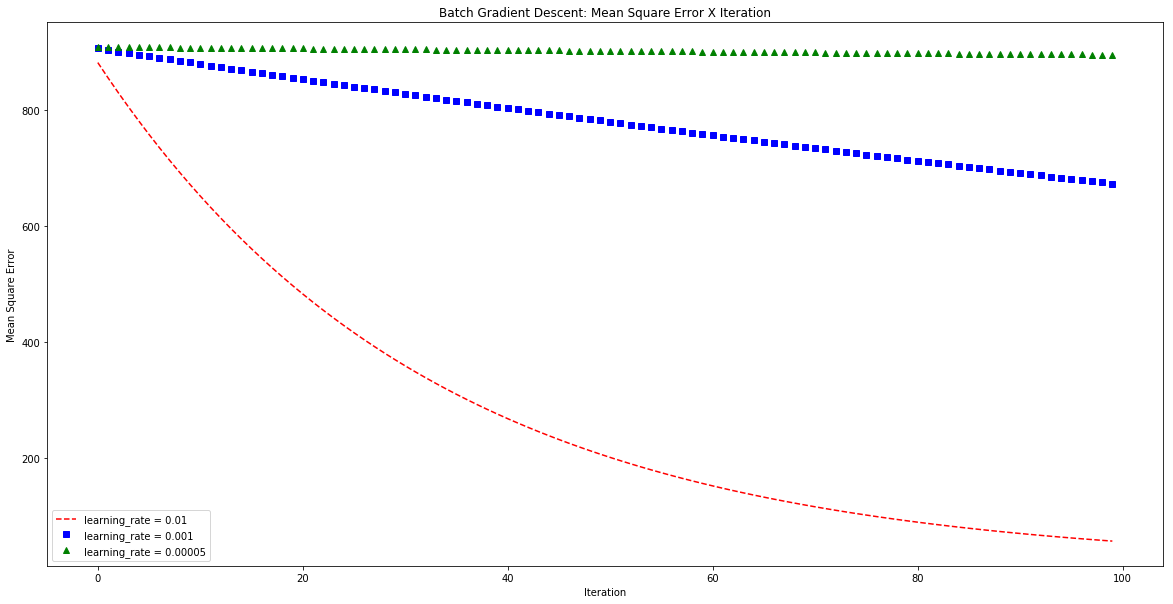

In [2]:
plt.figure(figsize=(20,10))
plt.plot(range(100), cost_history1, 'r--', range(100), cost_history2, 'bs', range(100), cost_history3, 'g^')
plt.ylabel('Mean Square Error')
plt.xlabel('Iteration')
plt.title('Batch Gradient Descent: Mean Square Error X Iteration')
plt.gca().legend(('learning_rate = 0.01','learning_rate = 0.001','learning_rate = 0.00005'))
plt.show()

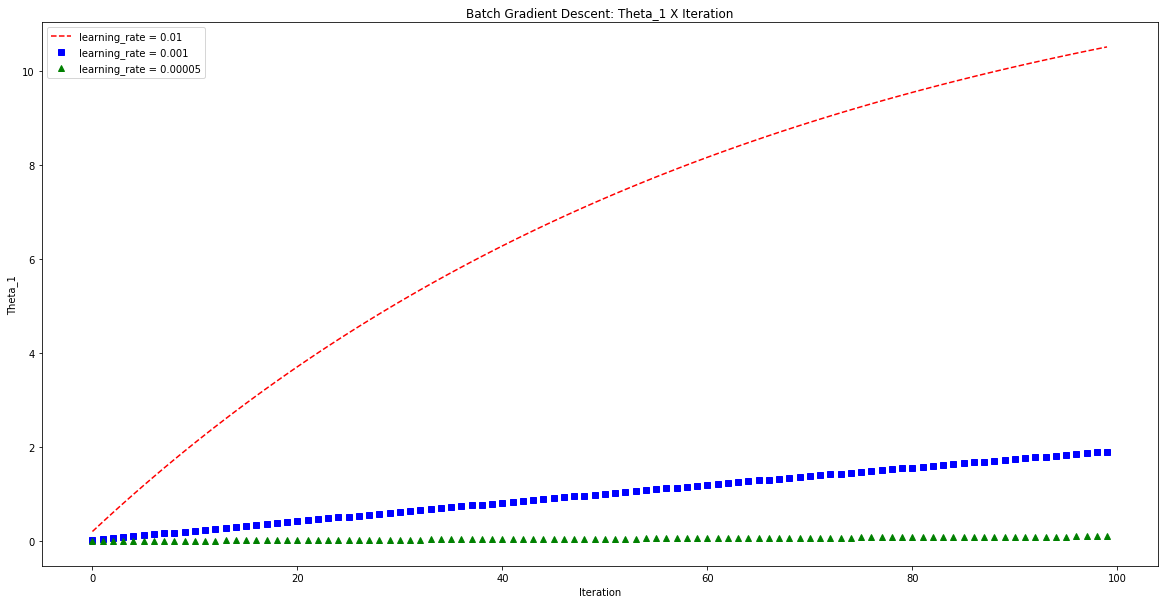

In [3]:
plt.figure(figsize=(20,10))
plt.plot(range(100), theta_history1[:,1].T, 'r--', range(100), theta_history2[:,1].T, 'bs', range(100), 
         theta_history3[:,1].T, 'g^')
plt.ylabel('Theta_1')
plt.xlabel('Iteration')
plt.title('Batch Gradient Descent: Theta_1 X Iteration')
plt.gca().legend(('learning_rate = 0.01','learning_rate = 0.001','learning_rate = 0.00005'))
plt.show()

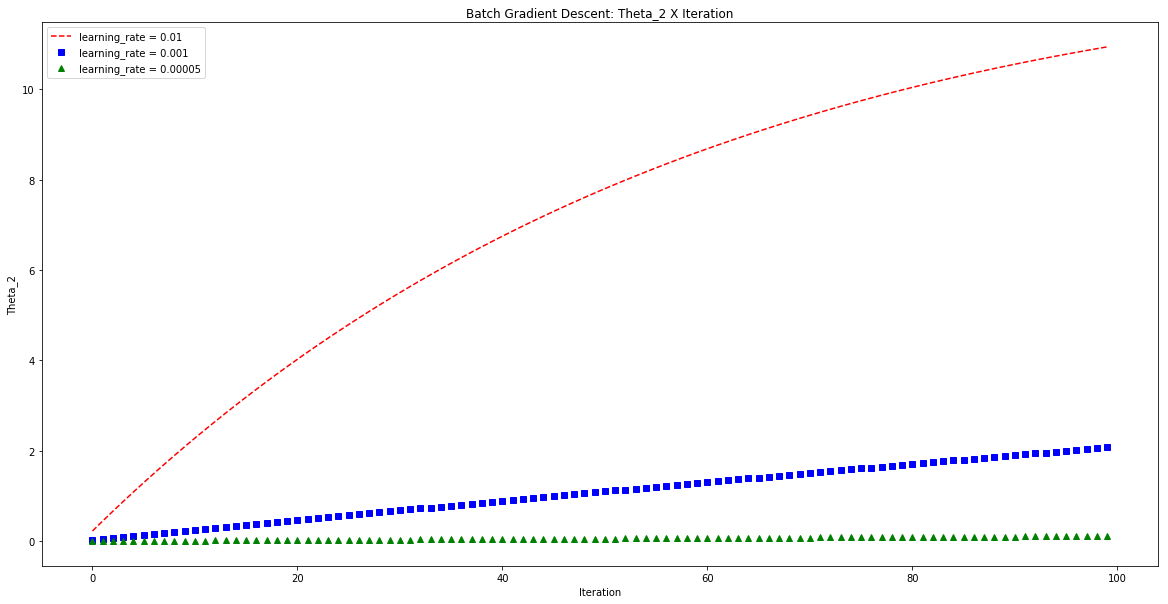

In [4]:
plt.figure(figsize=(20,10))
plt.plot(range(100), theta_history1[:,2].T, 'r--', range(100), theta_history2[:,2].T, 'bs', range(100), 
         theta_history3[:,2].T, 'g^')
plt.ylabel('Theta_2')
plt.xlabel('Iteration')
plt.title('Batch Gradient Descent: Theta_2 X Iteration')
plt.gca().legend(('learning_rate = 0.01','learning_rate = 0.001','learning_rate = 0.00005'))
plt.show()

In [5]:
# Comentario: Pelos 3 graficos é possível ver que a taxa de convergencia do erro quadratico medio quando o 
# learning rate é 0.01 é bem mais rápida do que quando é 0.001. Sendo que este erro parece aproximadamente 
# diminuir pela metade a cada 20 iterações para o rate de 0.01, no de 0.001 a taxa de decrescimo é linear e
# enquanto no de 0.0005 o erro aproximadamente não varia. Ambos os graficos dos thetas são muito similares. 
# Para o rate = 0.01 o grafico é aproxidamente uma curvatura, para o rate = 0.001 é linear e para 
# o 0.0005 é uma reta constante.

In [6]:
# import data
y = np.load("Ex3y.npy")
data = np.zeros((100,3))
data[:,1:] = np.load("Ex3X.npy") 
data[:,0] = 1.0

# Mean Square Error
def mean_square_error(data,y,theta):
    M = len(y)
    error = y - np.dot(data,theta)
    return (1.0/(2.0*M))*np.dot(error.T, error)

# select one sample
def select_sample(data,y):
    M       = len(y)
    rand_id = np.random.choice(M, size = 1)
    return (data[rand_id], y[rand_id])
    
# Stochastic gradient descent
def stochastic_GD(data,y,theta,learning_rate,n_iterations):
    
    # M = number of variables, in this case 100.
    M       = len(y)
    # create cost and theta history
    cost_history  = np.zeros(n_iterations)
    theta_history = np.zeros((n_iterations,3)) 
    
    for i in range(0,n_iterations):
        (sample,y_sample)   = select_sample(data,y)
        hypothesis          = np.dot(sample,theta)
        theta               = theta - learning_rate*(1.0/M)*(np.dot(sample.T,hypothesis - y_sample)) 
        theta_history[i,:]  = theta.T
        cost_history[i]     = mean_square_error(data,y,theta)
        
    return (theta_history, cost_history)

theta = np.full((3,1),0.0)
(theta_h_sgd, cost_h_sgd) = stochastic_GD(data,y,theta,0.05,1000)

In [7]:
# import data
y = np.load("Ex3y.npy")
data = np.zeros((100,3))
data[:,1:] = np.load("Ex3X.npy") 
data[:,0] = 1.0

# Mean Square Error
def mean_square_error(data,y,theta):
    M = len(y)
    error = y - np.dot(data,theta)
    return (1.0/(2.0*M))*np.dot(error.T, error)

# select a mini-batch of size batch_size
def select_mini_batch(data,y,batch_size):
    M       = len(y)
    rand_id = np.random.choice(M, size = batch_size)
    return (data[rand_id], y[rand_id])
    
# Mini-batch gradient descent
def mini_batch_GD(data,y,theta,learning_rate,n_iterations,batch_size):
    
    # M = number of variables, in this case 100.
    M       = len(y)
    # n_batch = number of mini_batch. M and batch_size must be divisible.
    n_batch = M/batch_size
    # create cost and theta history
    cost_history  = np.zeros(n_iterations)
    theta_history = np.zeros((n_iterations,3)) 
    
    for i in range(0,n_iterations):
        for j in range(0,n_batch):
            (batch,y_batch) = select_mini_batch(data,y,batch_size)
            hypothesis      = np.dot(batch,theta)
            theta           = theta - learning_rate*(1.0/M)*(np.dot(batch.T,hypothesis - y_batch)) 
        theta_history[i,:]  = theta.T
        cost_history[i]     = mean_square_error(data,y,theta)
        
    return (theta_history, cost_history)


theta = np.full((3,1),0.0)
(theta_h_mini, cost_h_mini) = mini_batch_GD(data,y,theta,0.05,1000,10)

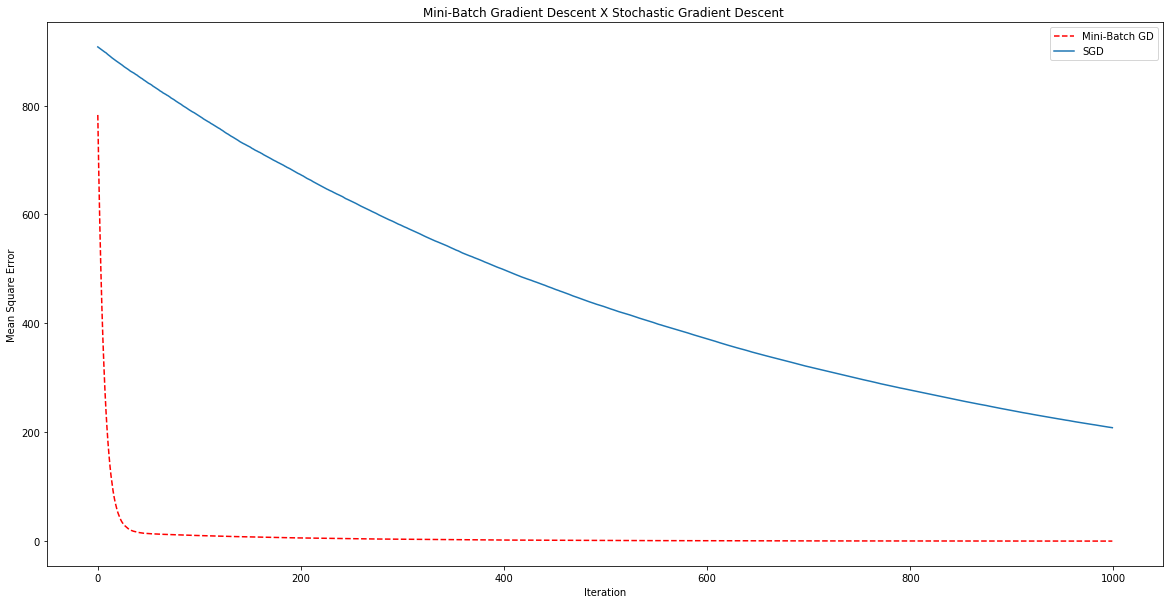

In [8]:
x = np.arange(0,1000,1)
y = np.zeros(1000)
plt.figure(figsize=(20,10))
plt.plot(range(1000), cost_h_mini, 'r--', range(1000), cost_h_sgd)
plt.ylabel('Mean Square Error')
plt.xlabel('Iteration')
plt.title('Mini-Batch Gradient Descent X Stochastic Gradient Descent ')
plt.gca().legend(('Mini-Batch GD','SGD'))
plt.show()

In [9]:
# Remarks: it's clear that mini-batch GD minimizes much faster than stochastic GD, converging to probably 
# the global minima in which the MSE is around 0.455

In [11]:
# Let's find the minima
# import data
y = np.load("Ex3y.npy")
data = np.zeros((100,3))
data[:,1:] = np.load("Ex3X.npy") 
data[:,0] = 1.0

# get the last theta of Mini-Batch GD
theta = np.full((3,1),0.0)
theta[:,0] = theta_h_mini[999,:]

print "The best theta is: ", theta.T

# calculate the MSE
minima = mean_square_error(data, y, theta)

# get the minima from the history of Mini-Batch GD
minima_found = cost_h_mini[999] 

print "The minima is: ", minima," = ", minima_found

The best theta is:  [[40.47418353  8.59029127 -3.72237435]]
The minima is:  [[0.45533274]]  =  0.4553327435361903
